In [59]:
import h2o

In [60]:
import pandas as pd

In [61]:
import numpy as np

In [62]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 48 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_started_from_R_laksh_wbn696
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.947 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [63]:
data = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [64]:
train, valid, test =data.split_frame([0.8, 0.1], seed = 69)

In [65]:
train.nrows

35255

In [67]:
y = "IsArrDelayed"
ignoreFields = ["ArrDelay", "DepDelay",
                  "CarrierDelay", "WeatherDelay",
                  "NASDelay", "SecurityDelay",
                  "IsDepDelayed", "IsArrDelayed",
                  "ActualElapsedTime"]
xAll = [ i for i in train.names if i not in ignoreFields]

In [69]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [71]:
m_def = H2ODeepLearningEstimator()
%time m_def.train(xAll, y, train, validation_frame = valid)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Wall time: 3min 42s
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1646113201554_1


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801,402 weights/biases, 9.2 MB, 356,439 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3803,Input,0.0,,,,,,,,,
1,,2,200,Rectifier,0.0,0.0,0.0,0.531786,0.477382,0.0,0.000039,0.025979,-0.350308,0.249273
2,,3,200,Rectifier,0.0,0.0,0.0,0.263975,0.33236,0.0,-0.002945,0.086314,-0.035483,0.274809
3,,4,2,Softmax,,0.0,0.0,0.02632,0.101319,0.0,-0.008797,0.32541,0.012554,0.317539




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.07336094089402698
RMSE: 0.27085224919506756
LogLoss: 0.23402943482310504
Mean Per-Class Error: 0.10022022517328438
AUC: 0.9669668011277649
AUCPR: 0.9747932534028733
Gini: 0.9339336022555298

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5335093439609626: 


,,NO,YES,Error,Rate
0,NO,4052.0,445.0,0.099,(445.0/4497.0)
1,YES,567.0,5020.0,0.1015,(567.0/5587.0)
2,Total,4619.0,5465.0,0.1004,(1012.0/10084.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.533509,0.908433,182.0
1,max f2,0.263013,0.937790,278.0
2,max f0point5,0.727134,0.925971,118.0
3,max accuracy,0.545743,0.900040,178.0
4,max precision,0.999963,1.000000,0.0
5,max recall,0.038215,1.000000,372.0
6,max specificity,0.999963,1.000000,0.0
7,max absolute_mcc,0.545743,0.799000,178.0
8,max min_per_class_accuracy,0.528603,0.898821,183.0
9,max mean_per_class_accuracy,0.572801,0.901046,170.0



Gains/Lift Table: Avg response rate: 55.40 %, avg score: 56.79 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.022511,1.000000,1.804904,1.804904,1.000000,1.000000,1.000000,1.000000,0.040630,0.040630,80.490424,80.490424,0.040630
1,2,0.030048,1.000000,1.804904,1.804904,1.000000,1.000000,1.000000,1.000000,0.013603,0.054233,80.490424,80.490424,0.054233
2,3,0.040063,1.000000,1.804904,1.804904,1.000000,1.000000,1.000000,1.000000,0.018078,0.072311,80.490424,80.490424,0.072311
3,4,0.050079,1.000000,1.804904,1.804904,1.000000,1.000000,1.000000,1.000000,0.018078,0.090388,80.490424,80.490424,0.090388
4,5,0.100060,0.999994,1.804904,1.804904,1.000000,0.999999,1.000000,0.999999,0.090209,0.180598,80.490424,80.490424,0.180598
5,6,0.150040,0.999898,1.804904,1.804904,1.000000,0.999962,1.000000,0.999987,0.090209,0.270807,80.490424,80.490424,0.270807
6,7,0.200020,0.998859,1.804904,1.804904,1.000000,0.999539,1.000000,0.999875,0.090209,0.361017,80.490424,80.490424,0.361017
7,8,0.299980,0.979690,1.797742,1.802518,0.996032,0.992419,0.998678,0.997390,0.179703,0.540720,79.774192,80.251759,0.539830
8,9,0.400040,0.883204,1.686843,1.773585,0.934589,0.942210,0.982647,0.983588,0.168785,0.709504,68.684311,77.358463,0.693938
9,10,0.500000,0.639482,1.419930,1.702882,0.786706,0.768840,0.943475,0.940656,0.141937,0.851441,41.992963,70.288169,0.788065




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.09636294767555169
RMSE: 0.3104238194397326
LogLoss: 0.30229227323725677
Mean Per-Class Error: 0.13682166161979986
AUC: 0.9439940441737055
AUCPR: 0.956461698039141
Gini: 0.8879880883474109

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45908425319906243: 


,,NO,YES,Error,Rate
0,NO,1609.0,324.0,0.1676,(324.0/1933.0)
1,YES,248.0,2091.0,0.106,(248.0/2339.0)
2,Total,1857.0,2415.0,0.1339,(572.0/4272.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.459084,0.879680,201.0
1,max f2,0.198267,0.917112,299.0
2,max f0point5,0.694926,0.896721,125.0
3,max accuracy,0.459084,0.866105,201.0
4,max precision,0.999973,1.000000,0.0
5,max recall,0.019218,1.000000,382.0
6,max specificity,0.999973,1.000000,0.0
7,max absolute_mcc,0.459084,0.729317,201.0
8,max min_per_class_accuracy,0.518383,0.862390,179.0
9,max mean_per_class_accuracy,0.499227,0.863771,186.0



Gains/Lift Table: Avg response rate: 54.75 %, avg score: 56.26 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.022472,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.041043,0.041043,82.642155,82.642155,0.041043
1,2,0.030197,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.014109,0.055152,82.642155,82.642155,0.055152
2,3,0.040028,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.017956,0.073108,82.642155,82.642155,0.073108
3,4,0.050094,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.018384,0.091492,82.642155,82.642155,0.091492
4,5,0.100187,0.999997,1.826422,1.826422,1.000000,0.999999,1.000000,1.000000,0.091492,0.182984,82.642155,82.642155,0.182984
5,6,0.150047,0.999910,1.826422,1.826422,1.000000,0.999971,1.000000,0.999990,0.091065,0.274049,82.642155,82.642155,0.274049
6,7,0.200140,0.998995,1.817887,1.824285,0.995327,0.999619,0.998830,0.999897,0.091065,0.365113,81.788687,82.428538,0.364596
7,8,0.300094,0.975935,1.787926,1.812175,0.978923,0.991599,0.992200,0.997133,0.178709,0.543822,78.792554,81.217489,0.538649
8,9,0.400047,0.859602,1.548395,1.746268,0.847775,0.930624,0.956115,0.980516,0.154767,0.698589,54.839485,74.626847,0.659789
9,10,0.500000,0.619730,1.253259,1.647713,0.686183,0.747699,0.902154,0.933974,0.125267,0.823856,25.325881,64.771270,0.715734




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-03-01 02:32:08,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-03-01 02:32:14,15.138 sec,1013 obs/sec,0.122139,1,4306.0,0.486223,0.661470,0.043167,...,0.757898,1.804904,0.398354,0.489350,0.668417,0.033417,0.697830,0.755420,1.826422,0.385534
2,,2022-03-01 02:33:43,1 min 45.071 sec,2018 obs/sec,4.858743,40,171295.0,0.341856,0.356538,0.527011,...,0.946717,1.804904,0.163031,0.361727,0.401130,0.471844,0.912159,0.931440,1.826422,0.174860
3,,2022-03-01 02:35:17,3 min 17.940 sec,2081 obs/sec,9.987434,82,352107.0,0.270852,0.234029,0.703087,...,0.974793,1.804904,0.100357,0.310424,0.302292,0.611035,0.943994,0.956462,1.826422,0.133895
4,,2022-03-01 02:35:28,3 min 29.040 sec,2081 obs/sec,10.110311,83,356439.0,0.284953,0.249999,0.671368,...,0.972698,1.804904,0.113745,0.321184,0.315688,0.583603,0.941854,0.956359,1.826422,0.140684
5,,2022-03-01 02:35:37,3 min 37.692 sec,2080 obs/sec,10.110311,83,356439.0,0.270852,0.234029,0.703087,...,0.974793,1.804904,0.100357,0.310424,0.302292,0.611035,0.943994,0.956462,1.826422,0.133895



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,ArrTime,1.000000,1.000000,0.002390
1,CRSArrTime,0.802900,0.802900,0.001919
2,TailNum.NA,0.695395,0.695395,0.001662
3,DepTime,0.594951,0.594951,0.001422
4,CRSDepTime,0.581912,0.581912,0.001391
5,CRSElapsedTime,0.447800,0.447800,0.001070
6,AirTime,0.442010,0.442010,0.001056
7,Cancelled,0.364869,0.364869,0.000872
8,Diverted,0.364497,0.364497,0.000871
9,TaxiOut,0.359591,0.359591,0.000859



See the whole table with table.as_data_frame()


In [72]:
m_def.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.09248368129640867
RMSE: 0.3041112975481323
LogLoss: 0.28867529116371
Mean Per-Class Error: 0.1341871456545587
AUC: 0.9475872215216478
AUCPR: 0.9610154053272553
Gini: 0.8951744430432955

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5032589352409812: 


,,NO,YES,Error,Rate
0,NO,1652.0,298.0,0.1528,(298.0/1950.0)
1,YES,289.0,2212.0,0.1156,(289.0/2501.0)
2,Total,1941.0,2510.0,0.1319,(587.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.503259,0.882858,191.0
1,max f2,0.262649,0.924460,274.0
2,max f0point5,0.790191,0.903841,97.0
3,max accuracy,0.553795,0.869692,173.0
4,max precision,0.999971,1.000000,0.0
5,max recall,0.020064,1.000000,379.0
6,max specificity,0.999971,1.000000,0.0
7,max absolute_mcc,0.553795,0.736952,173.0
8,max min_per_class_accuracy,0.551338,0.869231,174.0
9,max mean_per_class_accuracy,0.553795,0.869867,173.0



Gains/Lift Table: Avg response rate: 56.19 %, avg score: 57.47 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.019771,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.035186,0.035186,77.968812,77.968812,0.035186
1,2,0.021344,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.002799,0.037985,77.968812,77.968812,0.037985
2,3,0.030106,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.015594,0.053579,77.968812,77.968812,0.053579
3,4,0.040216,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017993,0.071571,77.968812,77.968812,0.071571
4,5,0.050101,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017593,0.089164,77.968812,77.968812,0.089164
5,6,0.100202,0.999996,1.779688,1.779688,1.000000,0.999999,1.000000,0.999999,0.089164,0.178329,77.968812,77.968812,0.178329
6,7,0.150079,0.999897,1.779688,1.779688,1.000000,0.999969,1.000000,0.999989,0.088764,0.267093,77.968812,77.968812,0.267093
7,8,0.200180,0.998859,1.779688,1.779688,1.000000,0.999547,1.000000,0.999879,0.089164,0.356257,77.968812,77.968812,0.356257
8,9,0.300157,0.975595,1.739695,1.766367,0.977528,0.991068,0.992515,0.996944,0.173930,0.530188,73.969513,76.636711,0.525060
9,10,0.400135,0.870163,1.607718,1.726727,0.903371,0.934892,0.970241,0.981440,0.160736,0.690924,60.771826,72.672716,0.663744


In [73]:
m_def

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1646113201554_1


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801,402 weights/biases, 9.2 MB, 356,439 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3803,Input,0.0,,,,,,,,,
1,,2,200,Rectifier,0.0,0.0,0.0,0.531786,0.477382,0.0,0.000039,0.025979,-0.350308,0.249273
2,,3,200,Rectifier,0.0,0.0,0.0,0.263975,0.33236,0.0,-0.002945,0.086314,-0.035483,0.274809
3,,4,2,Softmax,,0.0,0.0,0.02632,0.101319,0.0,-0.008797,0.32541,0.012554,0.317539




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.07336094089402698
RMSE: 0.27085224919506756
LogLoss: 0.23402943482310504
Mean Per-Class Error: 0.10022022517328438
AUC: 0.9669668011277649
AUCPR: 0.9747932534028733
Gini: 0.9339336022555298

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5335093439609626: 


,,NO,YES,Error,Rate
0,NO,4052.0,445.0,0.099,(445.0/4497.0)
1,YES,567.0,5020.0,0.1015,(567.0/5587.0)
2,Total,4619.0,5465.0,0.1004,(1012.0/10084.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.533509,0.908433,182.0
1,max f2,0.263013,0.937790,278.0
2,max f0point5,0.727134,0.925971,118.0
3,max accuracy,0.545743,0.900040,178.0
4,max precision,0.999963,1.000000,0.0
5,max recall,0.038215,1.000000,372.0
6,max specificity,0.999963,1.000000,0.0
7,max absolute_mcc,0.545743,0.799000,178.0
8,max min_per_class_accuracy,0.528603,0.898821,183.0
9,max mean_per_class_accuracy,0.572801,0.901046,170.0



Gains/Lift Table: Avg response rate: 55.40 %, avg score: 56.79 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.022511,1.000000,1.804904,1.804904,1.000000,1.000000,1.000000,1.000000,0.040630,0.040630,80.490424,80.490424,0.040630
1,2,0.030048,1.000000,1.804904,1.804904,1.000000,1.000000,1.000000,1.000000,0.013603,0.054233,80.490424,80.490424,0.054233
2,3,0.040063,1.000000,1.804904,1.804904,1.000000,1.000000,1.000000,1.000000,0.018078,0.072311,80.490424,80.490424,0.072311
3,4,0.050079,1.000000,1.804904,1.804904,1.000000,1.000000,1.000000,1.000000,0.018078,0.090388,80.490424,80.490424,0.090388
4,5,0.100060,0.999994,1.804904,1.804904,1.000000,0.999999,1.000000,0.999999,0.090209,0.180598,80.490424,80.490424,0.180598
5,6,0.150040,0.999898,1.804904,1.804904,1.000000,0.999962,1.000000,0.999987,0.090209,0.270807,80.490424,80.490424,0.270807
6,7,0.200020,0.998859,1.804904,1.804904,1.000000,0.999539,1.000000,0.999875,0.090209,0.361017,80.490424,80.490424,0.361017
7,8,0.299980,0.979690,1.797742,1.802518,0.996032,0.992419,0.998678,0.997390,0.179703,0.540720,79.774192,80.251759,0.539830
8,9,0.400040,0.883204,1.686843,1.773585,0.934589,0.942210,0.982647,0.983588,0.168785,0.709504,68.684311,77.358463,0.693938
9,10,0.500000,0.639482,1.419930,1.702882,0.786706,0.768840,0.943475,0.940656,0.141937,0.851441,41.992963,70.288169,0.788065




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.09636294767555169
RMSE: 0.3104238194397326
LogLoss: 0.30229227323725677
Mean Per-Class Error: 0.13682166161979986
AUC: 0.9439940441737055
AUCPR: 0.956461698039141
Gini: 0.8879880883474109

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45908425319906243: 


,,NO,YES,Error,Rate
0,NO,1609.0,324.0,0.1676,(324.0/1933.0)
1,YES,248.0,2091.0,0.106,(248.0/2339.0)
2,Total,1857.0,2415.0,0.1339,(572.0/4272.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.459084,0.879680,201.0
1,max f2,0.198267,0.917112,299.0
2,max f0point5,0.694926,0.896721,125.0
3,max accuracy,0.459084,0.866105,201.0
4,max precision,0.999973,1.000000,0.0
5,max recall,0.019218,1.000000,382.0
6,max specificity,0.999973,1.000000,0.0
7,max absolute_mcc,0.459084,0.729317,201.0
8,max min_per_class_accuracy,0.518383,0.862390,179.0
9,max mean_per_class_accuracy,0.499227,0.863771,186.0



Gains/Lift Table: Avg response rate: 54.75 %, avg score: 56.26 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.022472,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.041043,0.041043,82.642155,82.642155,0.041043
1,2,0.030197,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.014109,0.055152,82.642155,82.642155,0.055152
2,3,0.040028,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.017956,0.073108,82.642155,82.642155,0.073108
3,4,0.050094,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.018384,0.091492,82.642155,82.642155,0.091492
4,5,0.100187,0.999997,1.826422,1.826422,1.000000,0.999999,1.000000,1.000000,0.091492,0.182984,82.642155,82.642155,0.182984
5,6,0.150047,0.999910,1.826422,1.826422,1.000000,0.999971,1.000000,0.999990,0.091065,0.274049,82.642155,82.642155,0.274049
6,7,0.200140,0.998995,1.817887,1.824285,0.995327,0.999619,0.998830,0.999897,0.091065,0.365113,81.788687,82.428538,0.364596
7,8,0.300094,0.975935,1.787926,1.812175,0.978923,0.991599,0.992200,0.997133,0.178709,0.543822,78.792554,81.217489,0.538649
8,9,0.400047,0.859602,1.548395,1.746268,0.847775,0.930624,0.956115,0.980516,0.154767,0.698589,54.839485,74.626847,0.659789
9,10,0.500000,0.619730,1.253259,1.647713,0.686183,0.747699,0.902154,0.933974,0.125267,0.823856,25.325881,64.771270,0.715734




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-03-01 02:32:08,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-03-01 02:32:14,15.138 sec,1013 obs/sec,0.122139,1,4306.0,0.486223,0.661470,0.043167,...,0.757898,1.804904,0.398354,0.489350,0.668417,0.033417,0.697830,0.755420,1.826422,0.385534
2,,2022-03-01 02:33:43,1 min 45.071 sec,2018 obs/sec,4.858743,40,171295.0,0.341856,0.356538,0.527011,...,0.946717,1.804904,0.163031,0.361727,0.401130,0.471844,0.912159,0.931440,1.826422,0.174860
3,,2022-03-01 02:35:17,3 min 17.940 sec,2081 obs/sec,9.987434,82,352107.0,0.270852,0.234029,0.703087,...,0.974793,1.804904,0.100357,0.310424,0.302292,0.611035,0.943994,0.956462,1.826422,0.133895
4,,2022-03-01 02:35:28,3 min 29.040 sec,2081 obs/sec,10.110311,83,356439.0,0.284953,0.249999,0.671368,...,0.972698,1.804904,0.113745,0.321184,0.315688,0.583603,0.941854,0.956359,1.826422,0.140684
5,,2022-03-01 02:35:37,3 min 37.692 sec,2080 obs/sec,10.110311,83,356439.0,0.270852,0.234029,0.703087,...,0.974793,1.804904,0.100357,0.310424,0.302292,0.611035,0.943994,0.956462,1.826422,0.133895



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,ArrTime,1.000000,1.000000,0.002390
1,CRSArrTime,0.802900,0.802900,0.001919
2,TailNum.NA,0.695395,0.695395,0.001662
3,DepTime,0.594951,0.594951,0.001422
4,CRSDepTime,0.581912,0.581912,0.001391
5,CRSElapsedTime,0.447800,0.447800,0.001070
6,AirTime,0.442010,0.442010,0.001056
7,Cancelled,0.364869,0.364869,0.000872
8,Diverted,0.364497,0.364497,0.000871
9,TaxiOut,0.359591,0.359591,0.000859



See the whole table with table.as_data_frame()


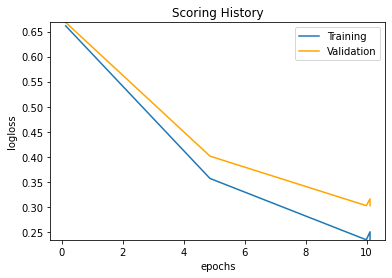

In [74]:
m_def.plot()

Tuning idea
Will more trianing effort helps?

In [ ]:
m_200_epochs = H2ODeepLearningEstimator(epochs = 200,
                                       stopping_rounds = 5,
                                       stopping_tolerance = 0,
                                       stopping_metric = "logloss")
%timeit m_200_epochs.train(xAll, y, train, validation_frame = valid)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |███████████████████████████████████

In [ ]:
m_200_epochs.model_performance(test)

In [ ]:
m_200_epochs.plot()

In [ ]:
m_200_epochs

Tuning Idea
Does it need another layer?

In [ ]:
m_200x200x200 =H2ODeepLearningEstimator(epochs = 200,
                                       hidden = [200, 200, 200]
                                       )
%time m_200x200x200.train(xAll, y, train, validation_frame = valid)

In [ ]:
m_200x200x200.model_performance(test)

In [ ]:
m_200x200x200.plot()

In [ ]:
m_400x400 =H2ODeepLearningEstimator(epochs = 200,
                                       hidden = [400, 400]
                                       )
%time m_400x400.train(xAll, y, train, validation_frame = valid)

In [ ]:
m_400x400.model_performance(test)

In [ ]:
m_400x400.plot()

In [ ]:
Why did it longer

In [ ]:
m_def.summary()

In [ ]:
m_def.summary()['units']

In [ ]:
(3801*200)+(200*200)+(200*2)

In [ ]:
m_200x200x200.summary()['units']

In [ ]:
m_400x400.summary()['units']